# Lab2 Кожуро Б Е

Для работы был выбран датасет dc-wikia-data

## Первичный анализ

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
data = pd.read_csv('dc-wikia-data.csv', sep=",")

In [3]:
data.shape

(6896, 13)

In [4]:
data.dtypes

page_id               int64
name                 object
urlslug              object
ID                   object
ALIGN                object
EYE                  object
HAIR                 object
SEX                  object
GSM                  object
ALIVE                object
APPEARANCES         float64
FIRST APPEARANCE     object
YEAR                float64
dtype: object

In [5]:
data.isnull().sum()

page_id                0
name                   0
urlslug                0
ID                  2013
ALIGN                601
EYE                 3628
HAIR                2274
SEX                  125
GSM                 6832
ALIVE                  3
APPEARANCES          355
FIRST APPEARANCE      69
YEAR                  69
dtype: int64

In [42]:
data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0


## Работа с пропусками

Оценим количество пропусков чтобы решить, как с ними поступать. 

In [6]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
total_count = data.shape[0]
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64' or dt=='object'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка ID. Тип данных object. Количество пустых значений 2013, 29.19%.
Колонка ALIGN. Тип данных object. Количество пустых значений 601, 8.72%.
Колонка EYE. Тип данных object. Количество пустых значений 3628, 52.61%.
Колонка HAIR. Тип данных object. Количество пустых значений 2274, 32.98%.
Колонка SEX. Тип данных object. Количество пустых значений 125, 1.81%.
Колонка GSM. Тип данных object. Количество пустых значений 6832, 99.07%.
Колонка ALIVE. Тип данных object. Количество пустых значений 3, 0.04%.
Колонка APPEARANCES. Тип данных float64. Количество пустых значений 355, 5.15%.
Колонка FIRST APPEARANCE. Тип данных object. Количество пустых значений 69, 1.0%.
Колонка YEAR. Тип данных float64. Количество пустых значений 69, 1.0%.


### удаление 
Удалять будем столбцы  в которых пропусков более 50%, и строки в которых пропусков до 7 %

In [7]:
data1 = data.drop(columns=['GSM', 'EYE'])

In [8]:
data2 = data1.dropna(subset=['ALIVE', 'YEAR', 'SEX'])

In [9]:
data2.isnull().sum()

page_id                0
name                   0
urlslug                0
ID                  1915
ALIGN                568
HAIR                2131
SEX                    0
ALIVE                  0
APPEARANCES          335
FIRST APPEARANCE       0
YEAR                   0
dtype: int64

In [10]:
print(f"удалено {data.shape[0]-data2.shape[0]} строки и {data.shape[1]-data2.shape[1]} столбца")

удалено 195 строки и 2 столбца


### заполнение

Понятно, что при заполнении нужно придерживаться нескольких правил. Для начала заполним пропуски в числовом критерии appearances

In [11]:
data2_appearances = data2[['APPEARANCES']]
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data2_appearances)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [14]:
strategies=['mean', 'median', 'most_frequent']
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data2_appearances)
    return data_num_imp[mask_missing_values_only]

In [15]:
strategies[2], test_num_impute(strategies[2])

('most_frequent',
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.

Поскольку пропуски в appearances вряд ли будут у часто всттечающихся персонажей, правильнее будет поставить им наиболее встречающееся число - 1. 

In [20]:
data2.loc[:,'APPEARANCES'] = data2.loc[:,'APPEARANCES'].fillna(value = 1)

In [21]:
data2.isnull().sum()

page_id                0
name                   0
urlslug                0
ID                  1915
ALIGN                568
HAIR                2131
SEX                    0
ALIVE                  0
APPEARANCES            0
FIRST APPEARANCE       0
YEAR                   0
dtype: int64

Теперь заполним категориальные признаки. 

In [22]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [23]:
data2['ID'].unique()

array(['Secret Identity', 'Public Identity', nan, 'Identity Unknown'],
      dtype=object)

In [24]:
data2['ID'].value_counts()

Public Identity     2409
Secret Identity     2368
Identity Unknown       9
Name: ID, dtype: int64

Вариантов заполнения 2 - либо заполняем более частым значением, либо же заполяем пунктом Identity unknown, заполним Identity Unknown.

In [25]:
data2.loc[:,'ID'] = data2.loc[:,'ID'].fillna(value = 'Identity Unknown')

In [26]:
data2['ALIGN'].unique()

array(['Good Characters', 'Bad Characters', 'Neutral Characters', nan,
       'Reformed Criminals'], dtype=object)

In [27]:
data2['ALIGN'].value_counts()

Bad Characters        2815
Good Characters       2765
Neutral Characters     550
Reformed Criminals       3
Name: ALIGN, dtype: int64

In [28]:
data2.loc[:,'ALIGN'] = data2.loc[:,'ALIGN'].fillna(value = 'Bad Characters')

In [29]:
data2.loc[:,'HAIR'] = data2.loc[:,'HAIR'].fillna(value = 'Unknown Hair')

In [30]:
data2.isnull().sum()

page_id             0
name                0
urlslug             0
ID                  0
ALIGN               0
HAIR                0
SEX                 0
ALIVE               0
APPEARANCES         0
FIRST APPEARANCE    0
YEAR                0
dtype: int64

Пропуски заполнены
## Кодирование категориальных признаков


In [32]:
data2.dtypes

page_id               int64
name                 object
urlslug              object
ID                   object
ALIGN                object
HAIR                 object
SEX                  object
ALIVE                object
APPEARANCES         float64
FIRST APPEARANCE     object
YEAR                float64
dtype: object

In [34]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
cat_enc_le = le.fit_transform(data2.loc[:, 'name'])
print(le.inverse_transform(np.unique(cat_enc_le)))
data2.loc[:, 'name'] = cat_enc_le

['3g4 (New Earth)' '500-ZQ (New Earth)' "A'Hwiirdh-Paan'A (New Earth)" ...
 'Zyklon (New Earth)' 'Zyn (New Earth)' 'Zzlrrrzzzm (New Earth)']


In [35]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(data2.loc[:, 'urlslug'])
print(le.inverse_transform(np.unique(cat_enc_le)))
data2.loc[:, 'urlslug'] = cat_enc_le

['\\/wiki\\/3g4_(New_Earth)' '\\/wiki\\/500-ZQ_(New_Earth)'
 '\\/wiki\\/A%27Hwiirdh-Paan%27A_(New_Earth)' ...
 '\\/wiki\\/Zyklon_(New_Earth)' '\\/wiki\\/Zyn_(New_Earth)'
 '\\/wiki\\/Zzlrrrzzzm_(New_Earth)']


In [44]:
cat_enc_le = le.fit_transform(data2.loc[:, 'ID'])
print(le.inverse_transform(np.unique(cat_enc_le)))
data2.loc[:, 'ID'] = cat_enc_le

[0 1 2]


In [50]:
cat_enc_le = le.fit_transform(data2.loc[:, 'ALIGN'])
print(le.inverse_transform(np.unique(cat_enc_le)))
data2.loc[:, 'ALIGN'] = cat_enc_le

['Bad Characters' 'Good Characters' 'Neutral Characters'
 'Reformed Criminals']


In [45]:
cat_enc_le = le.fit_transform(data2.loc[:, 'HAIR'])
print(le.inverse_transform(np.unique(cat_enc_le)))
data2.loc[:, 'HAIR'] = cat_enc_le

['Black Hair' 'Blond Hair' 'Blue Hair' 'Brown Hair' 'Gold Hair'
 'Green Hair' 'Grey Hair' 'Orange Hair' 'Pink Hair' 'Platinum Blond Hair'
 'Purple Hair' 'Red Hair' 'Reddish Brown Hair' 'Silver Hair'
 'Strawberry Blond Hair' 'Unknown Hair' 'Violet Hair' 'White Hair']


In [46]:
cat_enc_le = le.fit_transform(data2.loc[:, 'SEX'])
print(le.inverse_transform(np.unique(cat_enc_le)))
data2.loc[:, 'SEX'] = cat_enc_le

['Female Characters' 'Genderless Characters' 'Male Characters'
 'Transgender Characters']


In [47]:
cat_enc_le = le.fit_transform(data2.loc[:, 'ALIVE'])
print(le.inverse_transform(np.unique(cat_enc_le)))
data2.loc[:, 'ALIVE'] = cat_enc_le

['Deceased Characters' 'Living Characters']


In [48]:
cat_enc_le = le.fit_transform(data2.loc[:, 'FIRST APPEARANCE'])
print(le.inverse_transform(np.unique(cat_enc_le)))
data2.loc[:, 'FIRST APPEARANCE'] = cat_enc_le

['1935, October' '1936, February' '1936, March' '1936, September'
 '1937, March' '1938, January' '1938, July' '1938, June' '1938, October'
 '1939, April' '1939, August' '1939, December' '1939, July' '1939, June'
 '1939, May' '1939, November' '1939, October' '1939, September' '1940'
 '1940, April' '1940, December' '1940, February' '1940, January'
 '1940, July' '1940, June' '1940, March' '1940, May' '1940, November'
 '1940, October' '1940, September' '1941, April' '1941, August'
 '1941, December' '1941, February' '1941, January' '1941, July'
 '1941, June' '1941, May' '1941, November' '1941, October'
 '1941, September' '1942, April' '1942, August' '1942, December'
 '1942, February' '1942, January' '1942, June' '1942, March' '1942, May'
 '1942, November' '1942, September' '1943, April' '1943, August'
 '1943, December' '1943, February' '1943, January' '1943, July'
 '1943, March' '1943, November' '1943, September' '1944, December'
 '1944, February' '1944, January' '1944, June' '1944, March' 

In [51]:
data2.dtypes

page_id               int64
name                  int64
urlslug               int32
ID                    int64
ALIGN                 int32
HAIR                  int32
SEX                   int32
ALIVE                 int32
APPEARANCES         float64
FIRST APPEARANCE      int32
YEAR                float64
dtype: object

In [52]:
data2.head()

,page_id,name,urlslug,ID,ALIGN,HAIR,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,583,583,2,1,0,2,1,3093.0,14,1939.0
1,23387,5830,5830,2,1,0,2,1,2496.0,452,1986.0
2,1458,2410,2410,2,1,3,2,1,1565.0,155,1959.0
3,1659,2908,2909,1,1,17,2,1,1316.0,458,1987.0
4,1576,5123,5123,2,1,0,2,1,1237.0,19,1940.0


Все закодировано. 
## Масштабирование

In [55]:
data2.describe()

,page_id,name,urlslug,ID,ALIGN,HAIR,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
count,6701.000000,6701.000000,6701.000000,6701.000000,6701.000000,6701.000000,6701.000000,6701.000000,6701.000000,6701.000000,6701.000000
mean,146507.050739,3350.000000,3350.000000,1.066259,0.578123,7.362632,1.416356,0.751977,22.884793,506.694523,1989.729145
std,108109.027918,1934.556409,1934.556409,0.797625,0.640936,6.705654,0.907873,0.431897,86.403863,188.394358,16.853253
min,1380.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1935.000000
25%,43057.000000,1675.000000,1675.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,413.000000,1983.000000
50%,139771.000000,3350.000000,3350.000000,1.000000,0.000000,3.000000,2.000000,1.000000,6.000000,532.000000,1992.000000
75%,212191.000000,5025.000000,5025.000000,2.000000,1.000000,15.000000,2.000000,1.000000,15.000000,663.000000,2003.000000
max,404010.000000,6700.000000,6700.000000,2.000000,3.000000,17.000000,3.000000,1.000000,3093.000000,771.000000,2013.000000


In [57]:
def draw_kde(col_list, df1, df2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(12, 5))
    # первый график
    ax1.set_title(label1)
    sns.kdeplot(data=df1[col_list], ax=ax1)
    # второй график
    ax2.set_title(label2)
    sns.kdeplot(data=df2[col_list], ax=ax2)
    plt.show()
    #draw_kde (['page_id', 'name', 'urlslug', 'ID', 'ALIGN', 'HAIR', 'SEX', 'ALIVE', 'APPEARANCES', 'YEAR', 'FIRST APPEARANCE'], data2, data2, 'still', 'still')

<AxesSubplot:ylabel='Density'>

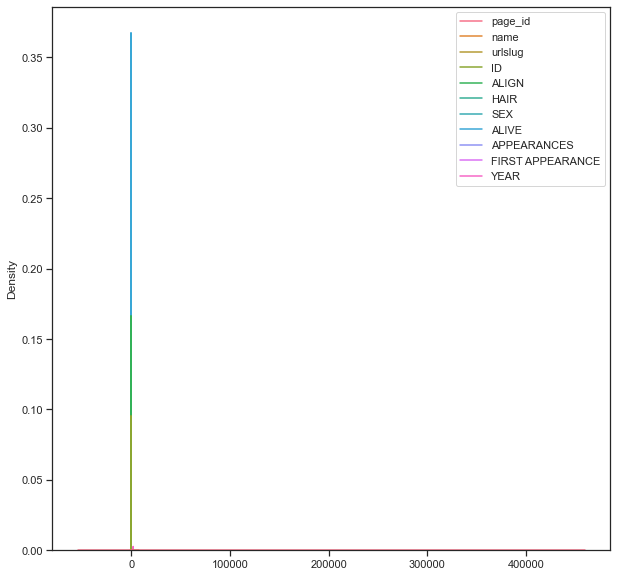

In [61]:
plt.figure(figsize = (10, 10))
sns.kdeplot(data=data2)

Отлично видно, что параметры распределены неравномерно. исправим это. 

In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [75]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs11 = StandardScaler()
data_cs11_scaled_temp = cs11.fit_transform(data2)
# формируем DataFrame на основе массива
data_cs11_scaled =  pd.DataFrame(data_cs11_scaled_temp, columns=data2.columns)
data_cs11_scaled.head()

,page_id,name,urlslug,ID,ALIGN,HAIR,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,-1.342125,-1.430409,-1.430409,1.170739,0.65827,-1.098056,0.642918,0.574306,35.534804,-2.615425,-3.010275
1,-1.138936,1.282043,1.282043,1.170739,0.65827,-1.098056,0.642918,0.574306,28.624875,-0.290341,-0.221288
2,-1.341792,-0.485936,-0.485936,1.170739,0.65827,-0.650639,0.642918,0.574306,17.849089,-1.866939,-1.823472
3,-1.339933,-0.228493,-0.227976,-0.083076,0.65827,1.437308,0.642918,0.574306,14.967059,-0.258491,-0.161948
4,-1.340701,0.916558,0.916558,1.170739,0.65827,-1.098056,0.642918,0.574306,14.052680,-2.588883,-2.950935


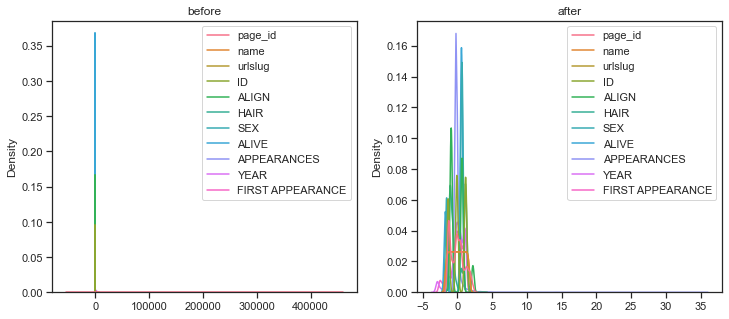

In [68]:
draw_kde(['page_id', 'name', 'urlslug', 'ID', 'ALIGN', 'HAIR', 'SEX', 'ALIVE', 'APPEARANCES', 'YEAR', 'FIRST APPEARANCE'], data2, data_cs11_scaled, 'before', 'after')

Как видно, масштабироание прошло успешно, поскольку теперь разница гораздо заметнее.

In [78]:
data_cs11_scaled.corr()

,page_id,name,urlslug,ID,ALIGN,HAIR,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
page_id,1.000000,-0.005713,-0.005714,-0.164841,-0.027130,0.034827,-0.070401,0.028640,-0.236994,0.253672,0.253560
name,-0.005713,1.000000,1.000000,-0.003745,0.006856,0.006946,0.022336,0.002052,0.003869,-0.021682,-0.023463
urlslug,-0.005714,1.000000,1.000000,-0.003749,0.006852,0.006949,0.022338,0.002051,0.003871,-0.021687,-0.023468
ID,-0.164841,-0.003745,-0.003749,1.000000,-0.035527,-0.081372,0.028266,-0.034174,0.110948,0.020654,0.011161
ALIGN,-0.027130,0.006856,0.006852,-0.035527,1.000000,-0.132652,-0.106437,0.047900,0.093915,-0.059530,-0.059715
HAIR,0.034827,0.006946,0.006949,-0.081372,-0.132652,1.000000,0.146174,-0.012848,-0.072017,0.023376,0.026616
SEX,-0.070401,0.022336,0.022338,0.028266,-0.106437,0.146174,1.000000,-0.070045,0.009033,-0.107070,-0.109871
ALIVE,0.028640,0.002052,0.002051,-0.034174,0.047900,-0.012848,-0.070045,1.000000,0.017544,0.048810,0.047527
APPEARANCES,-0.236994,0.003869,0.003871,0.110948,0.093915,-0.072017,0.009033,0.017544,1.000000,-0.238503,-0.247670
FIRST APPEARANCE,0.253672,-0.021682,-0.021687,0.020654,-0.059530,0.023376,-0.107070,0.048810,-0.238503,1.000000,0.993906


In [79]:
data2.corr()

,page_id,name,urlslug,ID,ALIGN,HAIR,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
page_id,1.000000,-0.005713,-0.005714,-0.164841,-0.027130,0.034827,-0.070401,0.028640,-0.236994,0.253672,0.253560
name,-0.005713,1.000000,1.000000,-0.003745,0.006856,0.006946,0.022336,0.002052,0.003869,-0.021682,-0.023463
urlslug,-0.005714,1.000000,1.000000,-0.003749,0.006852,0.006949,0.022338,0.002051,0.003871,-0.021687,-0.023468
ID,-0.164841,-0.003745,-0.003749,1.000000,-0.035527,-0.081372,0.028266,-0.034174,0.110948,0.020654,0.011161
ALIGN,-0.027130,0.006856,0.006852,-0.035527,1.000000,-0.132652,-0.106437,0.047900,0.093915,-0.059530,-0.059715
HAIR,0.034827,0.006946,0.006949,-0.081372,-0.132652,1.000000,0.146174,-0.012848,-0.072017,0.023376,0.026616
SEX,-0.070401,0.022336,0.022338,0.028266,-0.106437,0.146174,1.000000,-0.070045,0.009033,-0.107070,-0.109871
ALIVE,0.028640,0.002052,0.002051,-0.034174,0.047900,-0.012848,-0.070045,1.000000,0.017544,0.048810,0.047527
APPEARANCES,-0.236994,0.003869,0.003871,0.110948,0.093915,-0.072017,0.009033,0.017544,1.000000,-0.238503,-0.247670
FIRST APPEARANCE,0.253672,-0.021682,-0.021687,0.020654,-0.059530,0.023376,-0.107070,0.048810,-0.238503,1.000000,0.993906


При этом важно заметить, что кореляционная матрица не изменилась.